In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics,preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, f1_score
from sklearn import model_selection
from sklearn import linear_model
%matplotlib inline

### Loading the appropriate data.

In [2]:
stats_df = pd.read_csv('NBA_clean_data_Efficient.csv')

# Dropping columns that won't help our model.
# We drop the PER column because we want the machine to predict the outcome only by the statistics.
stats_df.drop(["Player", "Year","Pos", "Tm", "Age","GS","PER"],axis=1, inplace = True)
stats_df

,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Efficient
0,61.0,737.0,124.0,228.0,0.544,0.0,1.0,0.000,124.0,227.0,...,73.0,135.0,208.0,29.0,20.0,28.0,43.0,91.0,304.0,1.0
1,58.0,1605.0,189.0,308.0,0.614,0.0,3.0,0.000,189.0,305.0,...,213.0,301.0,514.0,111.0,54.0,38.0,78.0,113.0,438.0,1.0
2,64.0,2143.0,456.0,800.0,0.570,2.0,8.0,0.250,454.0,792.0,...,142.0,431.0,573.0,346.0,75.0,66.0,169.0,145.0,1197.0,1.0
3,26.0,674.0,140.0,296.0,0.473,31.0,80.0,0.388,109.0,216.0,...,19.0,99.0,118.0,49.0,11.0,29.0,27.0,47.0,352.0,1.0
4,46.0,1007.0,192.0,458.0,0.419,76.0,219.0,0.347,116.0,239.0,...,13.0,131.0,144.0,102.0,47.0,22.0,69.0,88.0,508.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12234,61.0,972.0,160.0,405.0,0.395,12.0,41.0,0.293,148.0,364.0,...,25.0,63.0,88.0,66.0,42.0,11.0,49.0,100.0,394.0,0.0
12235,62.0,1421.0,306.0,550.0,0.556,0.0,5.0,0.000,306.0,545.0,...,49.0,136.0,185.0,96.0,39.0,46.0,73.0,160.0,788.0,1.0
12236,80.0,2960.0,711.0,1298.0,0.548,15.0,49.0,0.306,696.0,1249.0,...,160.0,318.0,478.0,288.0,99.0,49.0,160.0,190.0,1685.0,1.0
12237,82.0,1393.0,138.0,328.0,0.421,16.0,59.0,0.271,122.0,269.0,...,29.0,93.0,122.0,231.0,82.0,4.0,80.0,84.0,383.0,0.0


### Scaling the data using MinMax scaler.

In [3]:
scaler = preprocessing.MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(stats_df))

In [4]:
scaled_df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.630769,0.197474,0.117362,0.100786,0.628571,0.000000,0.000973,0.000,0.129032,0.128032,...,0.139579,0.132338,0.134817,0.024914,0.081301,0.074468,0.090713,0.241192,0.105449,1.0
1,0.584615,0.446613,0.180407,0.137772,0.739683,0.000000,0.002918,0.000,0.196670,0.172025,...,0.407266,0.297512,0.335079,0.095361,0.219512,0.101064,0.166307,0.300813,0.152866,1.0
2,0.676923,0.601033,0.439379,0.365233,0.669841,0.004975,0.007782,0.250,0.472425,0.446701,...,0.271511,0.426866,0.373691,0.297251,0.304878,0.175532,0.362851,0.387534,0.421444,1.0
3,0.092308,0.179392,0.132881,0.132224,0.515873,0.077114,0.077821,0.388,0.113424,0.121827,...,0.036329,0.096517,0.075916,0.042096,0.044715,0.077128,0.056156,0.121951,0.122435,1.0
4,0.400000,0.274971,0.183317,0.207120,0.430159,0.189055,0.213035,0.347,0.120708,0.134800,...,0.024857,0.128358,0.092932,0.087629,0.191057,0.058511,0.146868,0.233062,0.177636,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12234,0.630769,0.264925,0.152279,0.182617,0.392063,0.029851,0.039883,0.293,0.154006,0.205302,...,0.047801,0.060697,0.056283,0.056701,0.170732,0.029255,0.103672,0.265583,0.137297,0.0
12235,0.646154,0.393800,0.293889,0.249653,0.647619,0.000000,0.004864,0.000,0.318418,0.307389,...,0.093690,0.133333,0.119764,0.082474,0.158537,0.122340,0.155508,0.428184,0.276716,1.0
12236,0.923077,0.835534,0.686712,0.595469,0.634921,0.037313,0.047665,0.306,0.724246,0.704456,...,0.305927,0.314428,0.311518,0.247423,0.402439,0.130319,0.343413,0.509485,0.594126,1.0
12237,0.953846,0.385763,0.130941,0.147018,0.433333,0.039801,0.057393,0.271,0.126951,0.151720,...,0.055449,0.090547,0.078534,0.198454,0.333333,0.010638,0.170626,0.222222,0.133404,0.0


### Machine Learning.

In [5]:
# Splitting the data to train and test.
# Fitting a LogsticRegression model.
X_train,X_test,y_train,y_test = train_test_split(scaled_df.drop([24],axis=1),scaled_df[24],test_size=0.2,random_state=42)
lrm = linear_model.LogisticRegression()
lrm.fit(X_train,y_train)


LogisticRegression()

In [6]:
y_pred = lrm.predict(X_test)

### Calculating scores by f1, Accuracy, Precision, Recall.

In [7]:
f1 = metrics.f1_score(y_test, y_pred)
acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)

In [8]:
print("f1 score: ",f1)
print("Accuracy score: ", acc)
print("Precision score: ", prec)
print("Recall score: ", rec)

f1 score:  0.8917127071823204
Accuracy score:  0.9199346405228758
Precision score:  0.9329479768786128
Recall score:  0.8539682539682539


In [9]:
# Compare test and predict
compare_df = pd.DataFrame({'Actual(PER)':y_test,'Predicted':y_pred})
compare_df

,Actual(PER),Predicted
3279,0.0,0.0
12015,0.0,0.0
6072,0.0,0.0
11910,1.0,1.0
7251,1.0,0.0
...,...,...
6425,0.0,0.0
5623,0.0,0.0
4722,0.0,0.0
3128,0.0,0.0


In [12]:
# Loading the scores data to a DataFrame.
df_scores_data = {'f1':f1,'Accuracy':acc,'Precision':prec,'Recall':rec}
df_scores = pd.DataFrame(df_scores_data, index=['Logistic Regression'])
df_scores

,f1,Accuracy,Precision,Recall
Logistic Regression,0.891713,0.919935,0.932948,0.853968


Text(0, 0.5, 'Value')

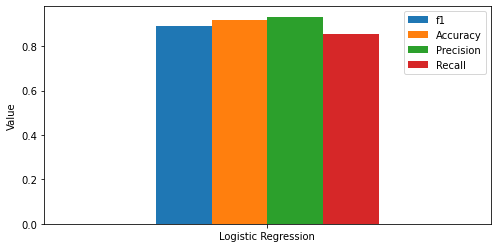

In [13]:
# Visualizing the scores and comparing them.
df_scores.plot.bar(rot=0,figsize=(8,4))
plt.legend(fontsize = 10)
plt.ylabel('Value')